In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fema = pd.read_csv("C:/Users/kesdr/Downloads/fema_disaster_data.csv")
print(fema.head())

  femaDeclarationString  disasterNumber state declarationType  \
0            FM-5522-CA            5522    CA              FM   
1            FM-5519-CA            5519    CA              FM   
2            FM-5519-CA            5519    CA              FM   
3            FM-5515-CA            5515    CA              FM   
4            FM-5503-CA            5503    CA              FM   

            declarationDate  fyDeclared incidentType declarationTitle  \
0  2024-07-27T00:00:00.000Z        2024         Fire       BOREL FIRE   
1  2024-07-25T00:00:00.000Z        2024         Fire        PARK FIRE   
2  2024-07-25T00:00:00.000Z        2024         Fire        PARK FIRE   
3  2024-07-21T00:00:00.000Z        2024         Fire    HAWARDEN FIRE   
4  2024-07-05T00:00:00.000Z        2024         Fire      FRENCH FIRE   

   ihProgramDeclared  iaProgramDeclared  ...  placeCode      designatedArea  \
0              False              False  ...      99029       Kern (County)   
1           

In [4]:
print('Number of instances = %d' % (fema.shape[0]))
print('Number of attributes = %d' % (fema.shape[1]))

Number of instances = 1684
Number of attributes = 28


In [5]:
print('Number of missing values:')
for col in fema.columns:
    print(f'{col}: {fema[col].isna().sum()}')

Number of missing values:
femaDeclarationString: 0
disasterNumber: 0
state: 0
declarationType: 0
declarationDate: 0
fyDeclared: 0
incidentType: 0
declarationTitle: 0
ihProgramDeclared: 0
iaProgramDeclared: 0
paProgramDeclared: 0
hmProgramDeclared: 0
incidentBeginDate: 0
incidentEndDate: 86
disasterCloseoutDate: 674
tribalRequest: 0
fipsStateCode: 0
fipsCountyCode: 0
placeCode: 0
designatedArea: 0
declarationRequestNumber: 0
lastIAFilingDate: 1397
incidentId: 0
region: 0
designatedIncidentTypes: 997
lastRefresh: 0
hash: 0
id: 0


In [6]:
femadrop = fema.drop(columns=['lastIAFilingDate','disasterCloseoutDate'])
femadrop

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
0,FM-5522-CA,5522,CA,FM,2024-07-27T00:00:00.000Z,2024,Fire,BOREL FIRE,False,False,...,29,99029,Kern (County),24102,2024072701,9,R,2024-08-27T18:22:14.800Z,51ec819011c936f387edf10b9d5839b35419ca95,9b73e19b-d326-4992-8da1-7e658d97607c
1,FM-5519-CA,5519,CA,FM,2024-07-25T00:00:00.000Z,2024,Fire,PARK FIRE,False,False,...,7,99007,Butte (County),24097,2024072502,9,R,2024-08-27T18:22:14.800Z,b97481ee189819bedfc82da45902c285e97adac1,00045754-7992-448a-a8ae-181fb748a576
2,FM-5519-CA,5519,CA,FM,2024-07-25T00:00:00.000Z,2024,Fire,PARK FIRE,False,False,...,103,99103,Tehama (County),24097,2024072502,9,R,2024-08-27T18:22:14.800Z,89dad7ad282644da289679375aa2ab32527cd600,db2f2bd5-ef12-4f8a-a50c-6f4b52b4ac99
3,FM-5515-CA,5515,CA,FM,2024-07-21T00:00:00.000Z,2024,Fire,HAWARDEN FIRE,False,False,...,65,99065,Riverside (County),24088,2024072201,9,R,2024-08-27T18:22:14.800Z,275071f84fac2a80fb802b6b821ca06ccfa4b227,8b0c7315-d9c0-4b9e-8d10-23f4e26fbe85
4,FM-5503-CA,5503,CA,FM,2024-07-05T00:00:00.000Z,2024,Fire,FRENCH FIRE,False,False,...,43,99043,Mariposa (County),24079,2024070501,9,R,2024-08-27T18:22:14.800Z,0248d9f210fb19d5147d1e5eb87d74e1e5f41d99,674a9eb9-7875-4a5f-a1e8-7cde3b040678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,DR-122-CA,122,CA,DR,1962-03-06T00:00:00.000Z,1962,Flood,FLOODS,False,True,...,0,0,Statewide,62007,62007,9,NaN,2024-08-27T18:22:14.800Z,cd2e965f0832198a6c5c788971f4daef295fdd93,eaf8a915-2f39-4481-9f44-b6df7e629f53
1680,DR-119-CA,119,CA,DR,1961-11-16T00:00:00.000Z,1962,Fire,FIRE (LOS ANGELES COUNTY),False,True,...,0,0,Statewide,61019,61019,9,NaN,2024-08-27T18:22:14.800Z,404e782ee3c37ee52b97126888f3fd9f010a698b,2bcfe547-7f8d-4801-961e-58492893ca64
1681,DR-82-CA,82,CA,DR,1958-04-04T00:00:00.000Z,1958,Flood,HEAVY RAINSTORMS & FLOOD,False,True,...,0,0,Statewide,58012,58012,9,W,2024-08-27T18:22:14.800Z,5cd7b7cdc477702499dca0bf2f66d27955cedafd,1d04457a-5ae5-4b7c-89c9-101403057a3a
1682,DR-65-CA,65,CA,DR,1956-12-29T00:00:00.000Z,1957,Fire,FOREST FIRE,False,True,...,0,0,Statewide,56018,56018,9,NaN,2024-08-27T18:22:14.800Z,a56f4b8eeb6ead2dd9c1a467bf9642d4f14c8e48,440c073c-ac03-45cb-8c91-4ee5a7d9c666


In [7]:
DIT_mode = femadrop['designatedIncidentTypes'].mode()[0]
femadrop.loc[:, 'designatedIncidentTypes'] = femadrop['designatedIncidentTypes'].fillna(DIT_mode)

In [8]:
print('Number of missing values:')
for col in femadrop.columns:
    print(f'{col}: {femadrop[col].isna().sum()}')

Number of missing values:
femaDeclarationString: 0
disasterNumber: 0
state: 0
declarationType: 0
declarationDate: 0
fyDeclared: 0
incidentType: 0
declarationTitle: 0
ihProgramDeclared: 0
iaProgramDeclared: 0
paProgramDeclared: 0
hmProgramDeclared: 0
incidentBeginDate: 0
incidentEndDate: 86
tribalRequest: 0
fipsStateCode: 0
fipsCountyCode: 0
placeCode: 0
designatedArea: 0
declarationRequestNumber: 0
incidentId: 0
region: 0
designatedIncidentTypes: 0
lastRefresh: 0
hash: 0
id: 0


In [9]:
femadrop = femadrop.dropna(subset=['incidentEndDate'])
print(femadrop['incidentEndDate'].isna().sum())

0


In [10]:
print(f"Duplicate rows: {femadrop.duplicated().sum()}")

Duplicate rows: 0


In [11]:
print(femadrop.dtypes)

femaDeclarationString       object
disasterNumber               int64
state                       object
declarationType             object
declarationDate             object
fyDeclared                   int64
incidentType                object
declarationTitle            object
ihProgramDeclared             bool
iaProgramDeclared             bool
paProgramDeclared             bool
hmProgramDeclared             bool
incidentBeginDate           object
incidentEndDate             object
tribalRequest                 bool
fipsStateCode                int64
fipsCountyCode               int64
placeCode                    int64
designatedArea              object
declarationRequestNumber     int64
incidentId                   int64
region                       int64
designatedIncidentTypes     object
lastRefresh                 object
hash                        object
id                          object
dtype: object


In [12]:
femadrop = femadrop.copy()

In [13]:
femadrop['declarationDate'] = pd.to_datetime(femadrop['declarationDate'])
femadrop['incidentEndDate'] = pd.to_datetime(femadrop['incidentEndDate'])
femadrop['incidentBeginDate'] = pd.to_datetime(femadrop['incidentBeginDate'])

In [14]:
categorical_cols = ['state', 'declarationType', 'incidentType', 'fipsStateCode', 'fipsCountyCode', 'designatedArea']

for col in categorical_cols:
    femadrop[col] = femadrop[col].astype('category')

In [15]:
print(femadrop.dtypes)

femaDeclarationString                    object
disasterNumber                            int64
state                                  category
declarationType                        category
declarationDate             datetime64[ns, UTC]
fyDeclared                                int64
incidentType                           category
declarationTitle                         object
ihProgramDeclared                          bool
iaProgramDeclared                          bool
paProgramDeclared                          bool
hmProgramDeclared                          bool
incidentBeginDate           datetime64[ns, UTC]
incidentEndDate             datetime64[ns, UTC]
tribalRequest                              bool
fipsStateCode                          category
fipsCountyCode                         category
placeCode                                 int64
designatedArea                         category
declarationRequestNumber                  int64
incidentId                              

In [16]:
print(femadrop['incidentType'].unique())

['Fire', 'Severe Storm', 'Flood', 'Hurricane', 'Tropical Storm', ..., 'Drought', 'Tsunami', 'Freezing', 'Fishing Losses', 'Other']
Length: 15
Categories (15, object): ['Biological', 'Coastal Storm', 'Dam/Levee Break', 'Drought', ..., 'Severe Storm', 'Tropical Storm', 'Tsunami', 'Winter Storm']


In [17]:
print(femadrop['incidentType'].value_counts())

incidentType
Flood              449
Fire               391
Severe Storm       384
Biological         116
Hurricane           64
Freezing            57
Drought             47
Coastal Storm       43
Earthquake          32
Dam/Levee Break      5
Fishing Losses       4
Tsunami              3
Other                1
Tropical Storm       1
Winter Storm         1
Name: count, dtype: int64


In [18]:
print(femadrop['state'].unique())
print(femadrop['designatedArea'].unique())
print(femadrop['placeCode'].unique())
print(femadrop['fipsStateCode'].unique())
print(femadrop['fipsCountyCode'].unique())

['CA']
Categories (1, object): ['CA']
['El Dorado (County)', 'Placer (County)', 'Riverside (County)', 'Siskiyou (County)', 'Mariposa (County)', ..., 'Resighini Rancheria (Indian Reservation)', 'Tule River Indian Reservation', 'Karuk Reservation', 'Yurok Indian Reservation', 'Statewide']
Length: 72
Categories (72, object): ['Agua Caliente Indian Reservation', 'Alameda (County)', 'Alpine (County)', 'Amador (County)', ..., 'Ventura (County)', 'Yolo (County)', 'Yuba (County)', 'Yurok Indian Reservation']
[99017 99061 99065 99093 99043 99059 99083 99089 99029 99071 99053 99057
 49334 99111 99037 99097 34659 99033 99045 99105 99073 99107 99039 99007
 99079 99019 99055 99005 99009 99095 99113 99049 99035 99109 10522 99103
 34554 99021 99087 99101 99025 99027   422 39374 72468 99001 99003 99015
 99023 99031 99041 99047 99063 99067 99075 99077 99081 99085 99091 99099
 99051 99069 62564 99011 99013 99115  9528 60347 80714 37825 87063     0]
[6]
Categories (1, int64): [6]
[17, 61, 65, 93, 43, ...

In [19]:
print(femadrop['state'].value_counts())

state
CA    1598
Name: count, dtype: int64


In [20]:
date_cols = ['declarationDate', 'incidentEndDate', 'incidentBeginDate']

for col in date_cols:
    femadrop[col] = femadrop[col].dt.strftime('%Y-%m-%d')

In [21]:
print(femadrop[['declarationDate', 'incidentEndDate', 'incidentBeginDate']].head())

   declarationDate incidentEndDate incidentBeginDate
6       2022-09-09      2022-09-26        2022-09-09
7       2022-09-09      2022-09-26        2022-09-09
8       2022-09-06      2022-09-14        2022-09-05
9       2022-09-02      2022-09-09        2022-09-02
10      2022-07-23      2022-08-03        2022-07-22


In [22]:
femadrop['incidentBeginDate'] = pd.to_datetime(femadrop['incidentBeginDate'])

In [23]:
femadrop['incidentYear'] = femadrop['incidentBeginDate'].dt.year

In [24]:
print(femadrop[['incidentBeginDate', 'incidentYear']].head())

   incidentBeginDate  incidentYear
6         2022-09-09          2022
7         2022-09-09          2022
8         2022-09-05          2022
9         2022-09-02          2022
10        2022-07-22          2022


In [25]:
#EDA

In [26]:
print(femadrop.describe())

       disasterNumber   fyDeclared              incidentBeginDate  \
count     1598.000000  1598.000000                           1598   
mean      2630.240300  2003.118273  2003-04-10 01:56:14.718398080   
min         15.000000  1954.000000            1954-02-05 00:00:00   
25%       1044.000000  1993.000000            1993-01-05 00:00:00   
50%       2826.500000  2006.000000            2005-12-17 00:00:00   
75%       4308.000000  2019.000000            2019-02-24 00:00:00   
max       5453.000000  2024.000000            2024-01-31 00:00:00   
std       1652.645276    17.197637                            NaN   

          placeCode  declarationRequestNumber    incidentId  region  \
count   1598.000000               1598.000000  1.598000e+03  1598.0   
mean   97447.272841              43632.416145  1.255732e+09     9.0   
min        0.000000                141.000000  5.401600e+04     9.0   
25%    99033.000000              17015.000000  9.300400e+04     9.0   
50%    99061.000000    

In [27]:
print("Incident types:")
print(fema['incidentType'].value_counts())

Incident types:
incidentType
Fire               477
Flood              449
Severe Storm       384
Biological         116
Hurricane           64
Freezing            57
Drought             47
Coastal Storm       43
Earthquake          32
Dam/Levee Break      5
Fishing Losses       4
Tsunami              3
Tropical Storm       1
Winter Storm         1
Other                1
Name: count, dtype: int64


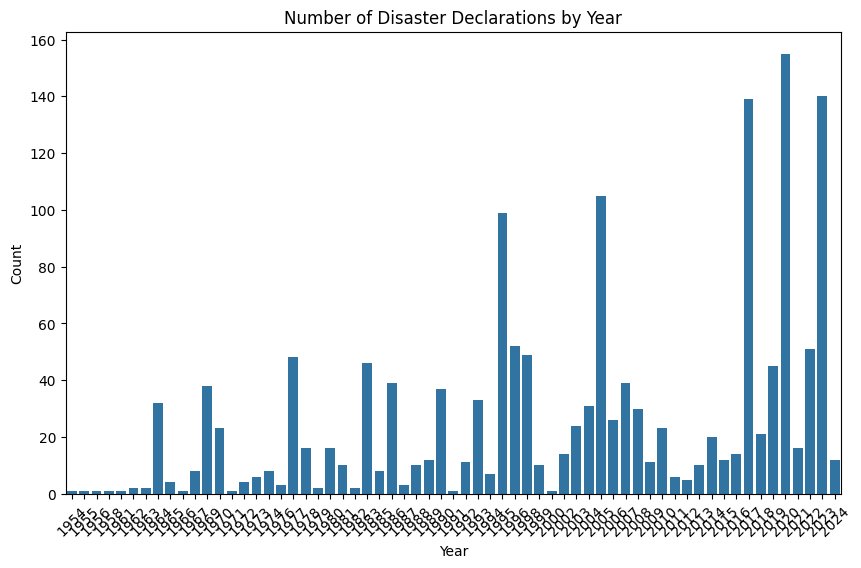

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='incidentYear', data=femadrop, order=sorted(femadrop['incidentYear'].unique()))
plt.title("Number of Disaster Declarations by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

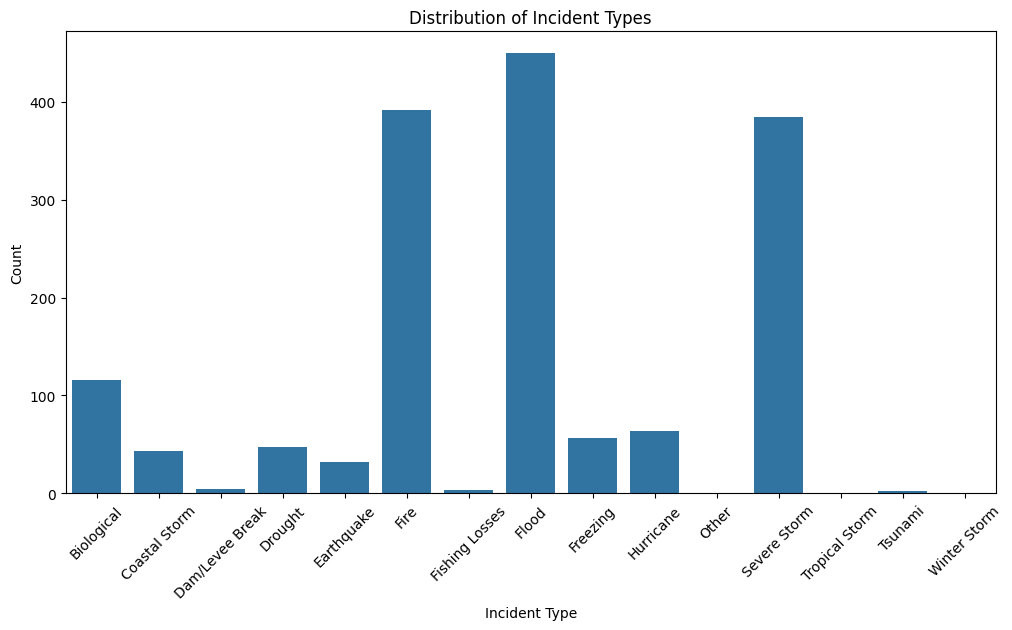

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='incidentType', data=femadrop)
plt.title("Distribution of Incident Types")
plt.xlabel("Incident Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [30]:
print("Disaster counts by Designated area:")
print(femadrop['designatedArea'].value_counts())

Disaster counts by Designated area:
designatedArea
Los Angeles (County)                          75
Riverside (County)                            62
San Bernardino (County)                       57
San Diego (County)                            47
Ventura (County)                              47
                                              ..
Karuk Reservation                              1
Rohnerville Rancheria (Indian Reservation)     1
Resighini Rancheria (Indian Reservation)       1
Tule River Indian Reservation                  1
Yurok Indian Reservation                       1
Name: count, Length: 72, dtype: int64


In [31]:
la_county = femadrop[femadrop['designatedArea'] == 'Los Angeles (County)']
print(la_county['incidentType'].value_counts())

incidentType
Fire               48
Flood              10
Severe Storm        8
Earthquake          3
Freezing            2
Biological          2
Coastal Storm       1
Hurricane           1
Fishing Losses      0
Dam/Levee Break     0
Drought             0
Other               0
Tropical Storm      0
Tsunami             0
Winter Storm        0
Name: count, dtype: int64


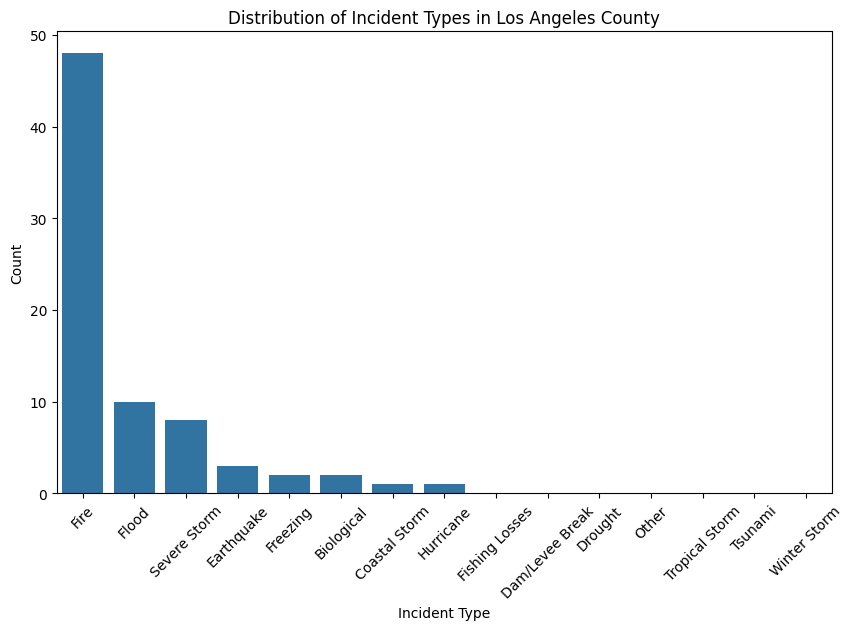

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='incidentType', data=la_county, order=la_county['incidentType'].value_counts().index)
plt.title("Distribution of Incident Types in Los Angeles County")
plt.xlabel("Incident Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\kesdr\AppData\Local\Temp\ipykernel_36184\882780262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_county['decade'] = (la_county['incidentYear'] // 10) * 10
C:\Users\kesdr\AppData\Local\Temp\ipykernel_36184\882780262.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_counts = la_county.groupby(['decade', 'incidentType']).size().reset_index(name='count')


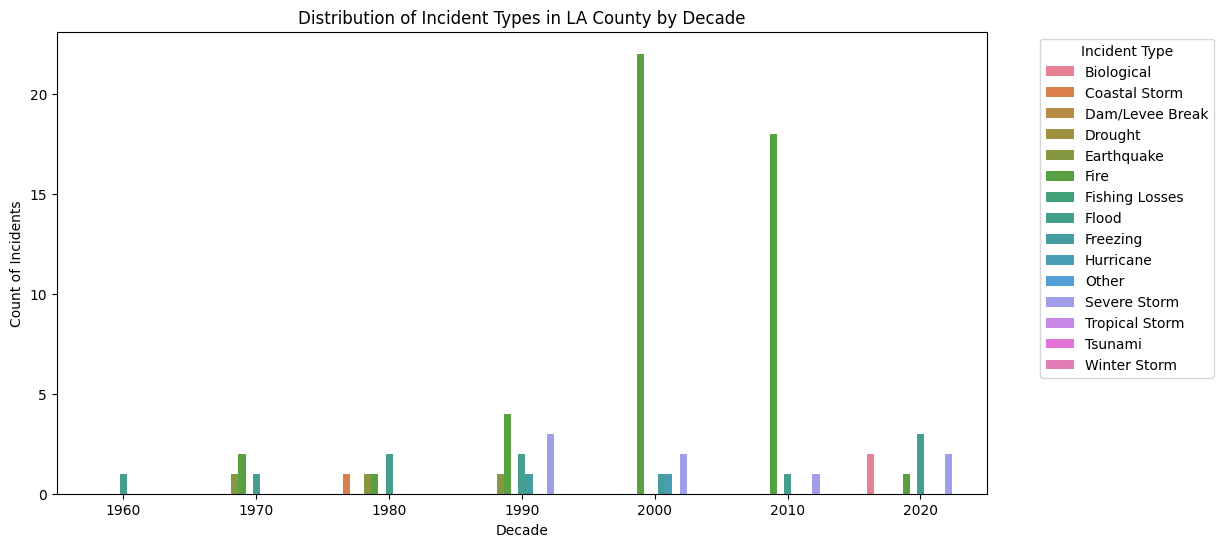

In [33]:
la_county['decade'] = (la_county['incidentYear'] // 10) * 10

decade_counts = la_county.groupby(['decade', 'incidentType']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=decade_counts, x='decade', y='count', hue='incidentType')
plt.title("Distribution of Incident Types in LA County by Decade")
plt.xlabel("Decade")
plt.ylabel("Count of Incidents")
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\kesdr\AppData\Local\Temp\ipykernel_36184\1377534053.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  la_counts = la_county.groupby(['incidentYear', 'incidentType']).size().reset_index(name='count')


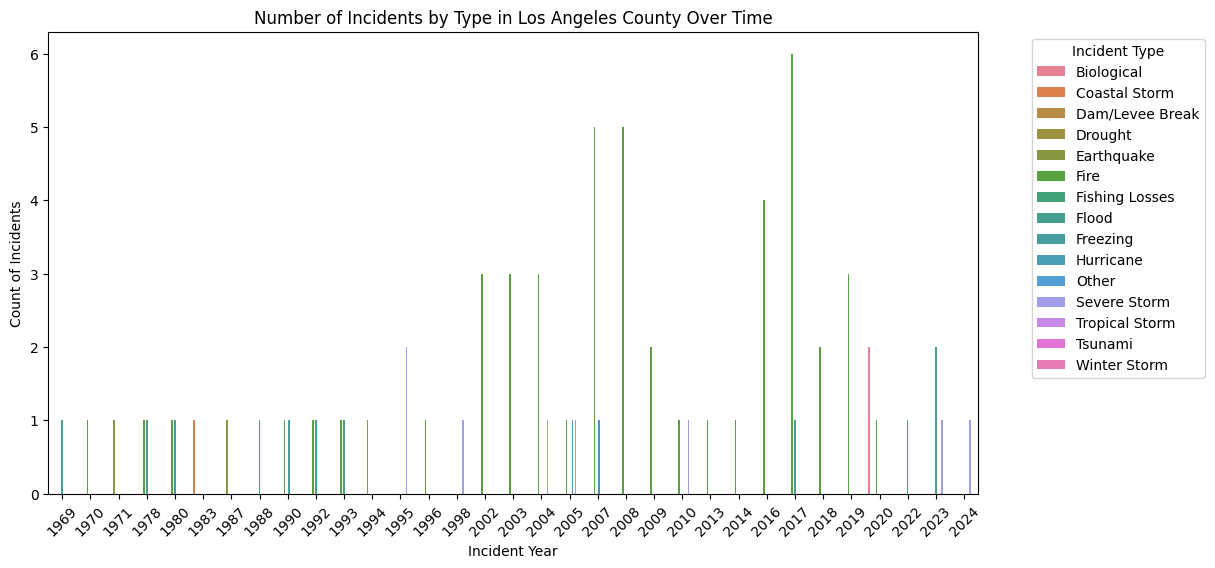

In [34]:
la_counts = la_county.groupby(['incidentYear', 'incidentType']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=la_counts, x='incidentYear', y='count', hue='incidentType')
plt.title("Number of Incidents by Type in Los Angeles County Over Time")
plt.xlabel("Incident Year")
plt.ylabel("Count of Incidents")
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

C:\Users\kesdr\AppData\Local\Temp\ipykernel_36184\2677515057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_counts = la_county.groupby(['incidentType', 'incidentYear']).size().unstack(fill_value=0)


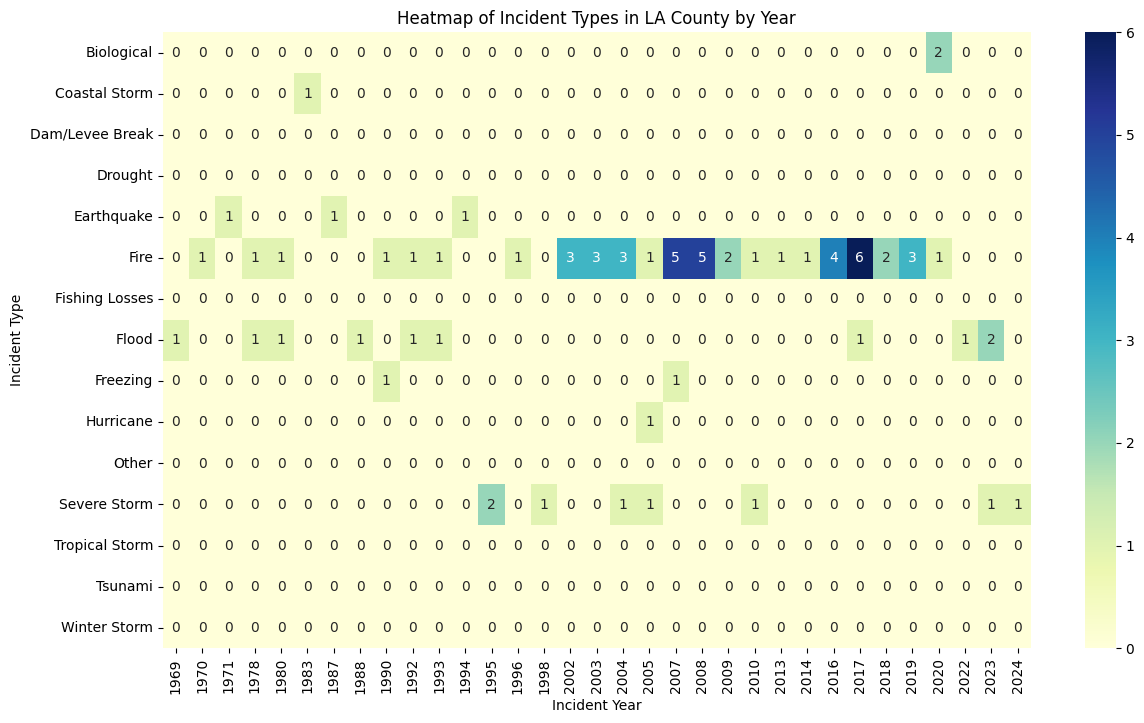

In [35]:
pivot_counts = la_county.groupby(['incidentType', 'incidentYear']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Incident Types in LA County by Year")
plt.xlabel("Incident Year")
plt.ylabel("Incident Type")
plt.show()